In [1]:
import pathlib
import pandas as pd
import geopandas as gpd
import folium
from haversine import haversine
import numpy as np
from geoband.API import GetCompasData
import seaborn as sns
import json
sns.set()


/opt/app-root/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
input_path = pathlib.Path('./data')
if not input_path.is_dir():
    input_path.mkdir()
    
    GetCompasData('SBJ_2012_001', '1', input_path.joinpath('1.오산시_주정차단속(2018~2020).csv'))
    GetCompasData('SBJ_2012_001', '2', input_path.joinpath('2.오산시_어린이교통사고_격자.geojson'))
    GetCompasData('SBJ_2012_001', '3', input_path.joinpath('3.오산시_차량등록현황_격자.geojson'))
    GetCompasData('SBJ_2012_001', '4', input_path.joinpath('4.오산시_연령별_거주인구격자(총인구).geojson'))
    GetCompasData('SBJ_2012_001', '5', input_path.joinpath('5.오산시_연령별_거주인구격자(유소년).geojson'))
    GetCompasData('SBJ_2012_001', '6', input_path.joinpath('6.오산시_연령별_거주인구격자(생산가능인구).geojson'))
    GetCompasData('SBJ_2012_001', '7', input_path.joinpath('7.오산시_연령별_거주인구격자(고령).geojson'))
    GetCompasData('SBJ_2012_001', '8', input_path.joinpath('8.오산시_유동인구(2019).csv'))
    GetCompasData('SBJ_2012_001', '9', input_path.joinpath('9.오산시_어린이보호구역.csv'))
    GetCompasData('SBJ_2012_001', '10', input_path.joinpath('10.오산시_학교위치정보.csv'))
    GetCompasData('SBJ_2012_001', '11', input_path.joinpath('11.오산시_초등학교_통학구.geojson'))
    GetCompasData('SBJ_2012_001', '12', input_path.joinpath('12.오산시_중학교_학군.geojson'))
    GetCompasData('SBJ_2012_001', '13', input_path.joinpath('13.오산시_어린이집_유치원현황.csv'))
    GetCompasData('SBJ_2012_001', '14', input_path.joinpath('14.오산시_기상데이터(2010~2019).csv'))
    GetCompasData('SBJ_2012_001', '15', input_path.joinpath('15.오산시_무인교통단속카메라.csv'))
    GetCompasData('SBJ_2012_001', '16', input_path.joinpath('16.오산시_도로안전표지표준데이터.csv'))
    GetCompasData('SBJ_2012_001', '17', input_path.joinpath('17.오산시_횡단보도.geojson'))
    GetCompasData('SBJ_2012_001', '18', input_path.joinpath('18.오산시_과속방지턱표준데이터.csv'))
    GetCompasData('SBJ_2012_001', '19', input_path.joinpath('19.오산시_신호등.geojson'))
    GetCompasData('SBJ_2012_001', '20', input_path.joinpath('20.오산시_CCTV설치현황.csv'))
    GetCompasData('SBJ_2012_001', '21', input_path.joinpath('21.오산시_인도.geojson'))
    GetCompasData('SBJ_2012_001', '22', input_path.joinpath('22.오산시_버스정류장.csv'))
    GetCompasData('SBJ_2012_001', '23', input_path.joinpath('23.오산시_상세도로망_LV6.geojson'))
    GetCompasData('SBJ_2012_001', '24', input_path.joinpath('24.평일_전일,시간대별_오산시_추정교통량_Level6.csv'))
    GetCompasData('SBJ_2012_001', '25', input_path.joinpath('25.평일_전일_오산시_혼잡빈도강도_Level6.csv'))
    GetCompasData('SBJ_2012_001', '26', input_path.joinpath('26.평일_전일_오산시_혼잡시간강도_Level6.csv'))
    GetCompasData('SBJ_2012_001', '27', input_path.joinpath('27.오산시_도로명주소_건물.geojson'))
    GetCompasData('SBJ_2012_001', '28', input_path.joinpath('28.오산시_건물연면적_격자.geojson'))
    GetCompasData('SBJ_2012_001', '29', input_path.joinpath('29.오산시_체육시설현황.csv'))
    GetCompasData('SBJ_2012_001', '30', input_path.joinpath('30.오산시_학원_및_교습소_현황.csv'))
    GetCompasData('SBJ_2012_001', '31', input_path.joinpath('31.오산시_법정경계(시군구).geojson'))
    GetCompasData('SBJ_2012_001', '32', input_path.joinpath('32.오산시_행정경계(읍면동).geojson'))
    GetCompasData('SBJ_2012_001', '33', input_path.joinpath('33.오산시_법정경계(읍면동).geojson'))
    GetCompasData('SBJ_2012_001', '34', input_path.joinpath('34.오산시_지적도.geojson'))
    GetCompasData('SBJ_2012_001', '35', input_path.joinpath('35.코드정의서.xlsx'))

### Font install & update => Permission Denied

In [3]:
import matplotlib
from matplotlib import font_manager, rc

#font_name=font_manager.FontProperties(fname="NanumBarunGothic.otf").get_name()
rc('font', family='URW Gothic')
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [4]:
! mv NanumBarunGothic.otf /usr/share/fonts

mv: cannot create regular file ‘/usr/share/fonts/NanumBarunGothic.otf’: Permission denied


In [5]:
! fc-cache -f -v

/usr/share/fonts: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/dejavu: caching, new cache contents: 9 fonts, 0 dirs
/usr/share/fonts/liberation: caching, new cache contents: 4 fonts, 0 dirs
/usr/share/fonts/urw-base35: caching, new cache contents: 69 fonts, 0 dirs
/usr/share/X11/fonts/Type1: caching, new cache contents: 13 fonts, 0 dirs
/usr/share/X11/fonts/TTF: skipping, no such directory
/usr/local/share/fonts: skipping, no such directory
/opt/app-root/src/.local/share/fonts: skipping, no such directory
/opt/app-root/src/.fonts: skipping, no such directory
/usr/share/fonts/dejavu: skipping, looped directory detected
/usr/share/fonts/liberation: skipping, looped directory detected
/usr/share/fonts/urw-base35: skipping, looped directory detected
/usr/lib/fontconfig/cache: not cleaning unwritable cache directory
/opt/app-root/src/.cache/fontconfig: cleaning cache directory
/opt/app-root/src/.fontconfig: not cleaning non-existent cache directory
/usr/bin/fc-cache-64: suc

In [6]:
kid_protect = pd.read_csv("data/9.오산시_어린이보호구역.csv")
osan_grid = gpd.read_file("data/32.오산시_행정경계(읍면동).geojson")
osan_lawgrid = gpd.read_file("data/33.오산시_법정경계(읍면동).geojson")

In [7]:
print("총 6개 행정 구분")
osan_grid['ADM_DR_NM'].values.tolist()

총 6개 행정 구분


['중앙동', '대원동', '남촌동', '신장동', '세마동', '초평동']

In [8]:
print("총 24개 법정 구분")
print(osan_lawgrid['EMD_KOR_NM'].values.tolist())

총 24개 법정 구분
['오산동', '부산동', '원동', '궐동', '청학동', '가장동', '금암동', '수청동', '은계동', '내삼미동', '외삼미동', '양산동', '세교동', '지곶동', '서랑동', '서동', '벌음동', '두곡동', '탑동', '누읍동', '가수동', '고현동', '청호동', '갈곶동']


In [9]:
kid_protect['시설종류'].value_counts()

어린이집    48
초등학교    25
유치원     17
특수학교     1
Name: 시설종류, dtype: int64

<AxesSubplot:xlabel='시설종류', ylabel='count'>

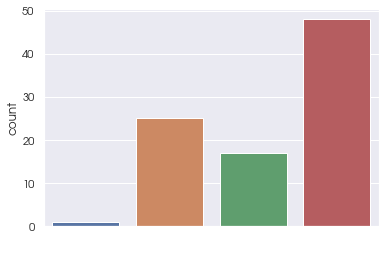

In [10]:
sns.countplot(x='시설종류',data=kid_protect)

In [11]:
center =[37.15222, 127.07056]
zoom =13

types = kid_protect['시설종류'].unique().tolist()

colors=['orange','blue','green','red']

m = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    osan_lawgrid,
    style_function=lambda feature: {
        'color': '#8b00ff',
        'weight': 3,
        'dashArray': '1,2,1'
    }
).add_to(m)

for place in kid_protect.iloc:
    type_ , name , has_cctv , num_cctv , road_width , longitude , latitude = place.values.tolist()
    idx = types.index(type_)

    folium.Marker(
      location=[latitude,longitude],
      popup=name,
      icon=folium.Icon(color=colors[idx],icon='child',prefix="fa")
    ).add_to(m)

m

In [12]:
hakwon = pd.read_csv("data/30.오산시_학원_및_교습소_현황.csv")

In [13]:
hakwon['시설위치_경도'].value_counts()

127.073777    63
127.068752    55
127.074729    49
127.044759    43
127.070391    42
              ..
127.062674     1
127.077719     1
127.067669     1
127.073840     1
127.054748     1
Name: 시설위치_경도, Length: 197, dtype: int64

In [14]:
def get_hak_nearby(row,range_):
    global hakwon
    
    pos = (row['보호구역_위도'],row['보호구역_경도'])
    coord_set=set()
    cnt=0
    
    for line in hakwon.iloc:
        tar = (line['시설위치_위도'],line['시설위치_경도'])        
        if (haversine(pos,tar)*1000 <= range_) and (tar not in coord_set) :
            coord_set.add(tar)
            cnt+=1
            
    return cnt

kid_protect['근방(50m) 학원/교습소 수'] = kid_protect.apply(lambda x : get_hak_nearby(x,50),axis=1)
kid_protect['근방(100m) 학원/교습소 수'] = kid_protect.apply(lambda x : get_hak_nearby(x,100),axis=1)

kid_protect.head(5)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,근방(50m) 학원/교습소 수,근방(100m) 학원/교습소 수
0,특수학교,성심학교,N,0,25,127.017521,37.176762,0,0
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103,0,0
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197,0,0
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106,0,2
4,초등학교,매홀초등학교,Y,2,6,127.063282,37.162749,0,0


In [15]:
kid_protect["근방(50m) 학원/교습소 수"].value_counts()

0    78
1     9
3     3
2     1
Name: 근방(50m) 학원/교습소 수, dtype: int64

In [16]:
kid_protect[kid_protect["근방(50m) 학원/교습소 수"]>0]

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,근방(50m) 학원/교습소 수,근방(100m) 학원/교습소 수
18,초등학교,화성초등학교,Y,3,12,127.069192,37.164773,1,2
33,유치원,이림유치원,Y,1,4,127.085741,37.135543,1,1
35,유치원,동탄우리유치원,Y,1,4,127.060252,37.196997,1,2
40,유치원,숲속다원유치원,Y,1,6,127.037738,37.151699,1,1
48,어린이집,시립매홀어린이집,Y,1,13,127.058825,37.172027,2,4
57,어린이집,하얀뜰어린이집,Y,1,3,127.071543,37.131670,1,3
62,어린이집,좋은아이어린이집,Y,1,5,127.060901,37.164621,1,1
65,어린이집,둥근해어린이집,N,0,7,127.056508,37.161239,3,4
68,어린이집,그린어린이집,N,0,4,127.069611,37.149776,1,1
69,어린이집,대일어린이집,Y,2,5,127.069474,37.154011,3,4


In [17]:
kid_protect["근방(100m) 학원/교습소 수"].value_counts()

0    59
1    16
2     8
3     4
4     3
5     1
Name: 근방(100m) 학원/교습소 수, dtype: int64

In [18]:
kid_protect[kid_protect["근방(100m) 학원/교습소 수"]>0].describe(include='all')

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,근방(50m) 학원/교습소 수,근방(100m) 학원/교습소 수
count,32,32,32,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
unique,3,32,2,NaN,NaN,NaN,NaN,NaN,NaN
top,어린이집,숲속다원유치원,Y,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,1,25,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.125000,7.40625,127.065591,37.150347,0.625000,1.906250
std,NaN,NaN,NaN,0.832796,3.44411,0.010305,0.016058,0.941858,1.146084
min,NaN,NaN,NaN,0.000000,3.00000,127.037738,37.130553,0.000000,1.000000
25%,NaN,NaN,NaN,1.000000,5.75000,127.058774,37.135125,0.000000,1.000000
50%,NaN,NaN,NaN,1.000000,6.00000,127.069333,37.150737,0.000000,1.500000
75%,NaN,NaN,NaN,1.000000,8.25000,127.071710,37.161869,1.000000,2.250000


__어린이 보호구역 별로 반경 50m 에 학원/교습소가 얼마나 있는지__

In [20]:
center =[37.15222, 127.07056]
zoom =13

types = kid_protect['시설종류'].unique().tolist()

colors=['orange','blue','green','red']

m2 = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    osan_lawgrid,
    style_function=lambda feature: {
        'color': '#8b00ff',
        'weight': 3,
        'opacity':0.2,
        'dashArray': '1,2,1'
    }
).add_to(m2)

for place in kid_protect.iloc:
    type_ , name , has_cctv , num_cctv , road_width , longitude , latitude, hak_50 , hak_100 = place.values.tolist()
    idx = types.index(type_)

    folium.Circle(
        location=[latitude,longitude],
        radius=50*int(hak_50)+10,
        color=colors[idx]
    ).add_to(m2)

m2

__어린이 보호구역 별로 반경 100m 에 학원/교습소가 얼마나 있는지__

In [21]:
center =[37.15222, 127.07056]
zoom =13

types = kid_protect['시설종류'].unique().tolist()

colors=['orange','blue','green','red']

m3 = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    osan_lawgrid,
    style_function=lambda feature: {
        'color': '#8b00ff',
        'weight': 3,
        'opacity':0.2,
        'dashArray': '1,2,1'
    }
).add_to(m3)

for place in kid_protect.iloc:
    type_ , name , has_cctv , num_cctv , road_width , longitude , latitude, hak_50 , hak_100 = place.values.tolist()
    idx = types.index(type_)

    folium.Circle(
        location=[latitude,longitude],
        radius=50*int(hak_100)+10,
        color=colors[idx]
    ).add_to(m3)

m3

__총인구수 격자데이터 Choropleth 로 나타내기__

In [2]:
with open("data/4.오산시_연령별_거주인구격자(총인구).geojson",encoding="utf=8") as f:
    gg = json.loads(f.read())
    f.close()
    
main_info = [dic['properties'] for dic in gg['features']]
df = pd.DataFrame(main_info)
df.val = df.val.fillna(0)

In [3]:
geo_data= "data/4.오산시_연령별_거주인구격자(총인구).geojson"

center =[37.15222, 127.07056]
zoom =13
    
m4 = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(
    geo_data=geo_data,
    data=df,
    columns=('gid','val'),
    key_on='feature.properties.gid',
    fill_color='Paired',
    legend_name='인구수 격자데이터',
).add_to(m4)

m4